<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/6_Email_Spam_Detection_and_Classification_Using_Naive_Bayes_Algorithm_Enhancing_Email_Filtering_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Email Spam Detection and Classification Using Naive Bayes Algorithm: Enhancing Email Filtering Efficiency.</b></div>

# *1. Import dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

# *2. Describe data*

In [ ]:
spam_df=pd.read_csv('Downloads/8_ml_project/Project 6/emails.csv')
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
 spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#

# *3. Visualization data*


In [ ]:
ham=spam_df[spam_df['spam']==0]
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [ ]:
spam=spam_df[spam_df['spam']==1]
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
print('Ham Percentage = ',(len(ham)/len(spam_df))*100,'%')

Ham Percentage =  76.11731843575419 %


In [ ]:
print('Spam Percentage = ',(len(spam)/len(spam_df))*100,'%')

Spam Percentage =  23.88268156424581 %


<Axes: xlabel='spam', ylabel='count'>

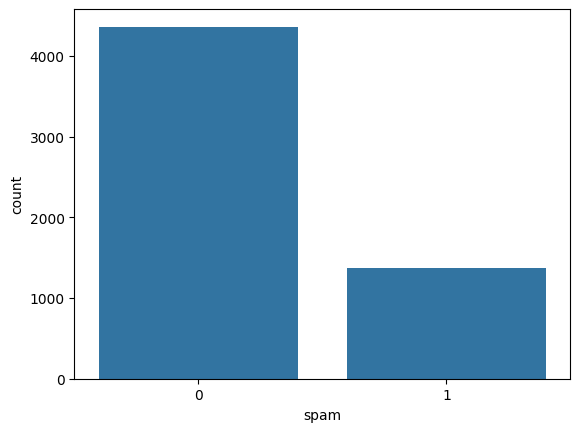

In [ ]:
sns.countplot(x='spam', data=spam_df)

#

#

# *4. Create testing and training dataset  //  data cleaning


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# just example
sample_data=['This is the first  the document', 'This is the second document','He is Javid Aliyev']
vector=CountVectorizer()

In [ ]:
X=vector.fit_transform(sample_data)
print(X.toarray())

[[0 1 1 0 1 0 0 2 1]
 [0 1 0 0 1 0 1 1 1]
 [1 0 0 1 1 1 0 0 0]]


In [ ]:
print(vector.get_feature_names_out())

['aliyev' 'document' 'first' 'he' 'is' 'javid' 'second' 'the' 'this']


In [ ]:
# Create a DataFrame from the dense matrix
df1 = pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out())

# Print the DataFrame
print(df1)

   aliyev  document  first  he  is  javid  second  the  this
0       0         1      1   0   1      0       0    2     1
1       0         1      0   0   1      0       1    1     1
2       1         0      0   1   1      1       0    0     0


In [ ]:
# for spam
vectorizer=CountVectorizer()
spamham_countvectorizer=vectorizer.fit_transform(spam_df['text'])
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [ ]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#

# *5 . Training the model*

In [ ]:
label=spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:

from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(spamham_countvectorizer,label)


MultinomialNB()

In [ ]:
testing_sample=['Free money', 'Hi Kim, Please let me know  if you need any further information']
testing_sample_conv=vectorizer.transform(testing_sample)
print(testing_sample_conv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
test_predict=NB_classifier.predict(testing_sample_conv)
test_predict

array([1, 0])

In [ ]:
x=spamham_countvectorizer
y=label

In [ ]:
x.shape

(5728, 37303)

In [ ]:
y.shape

(5728,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split( x,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)


MultinomialNB()

#

# *6. Evaluate model*

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 1, 0])

<Axes: >

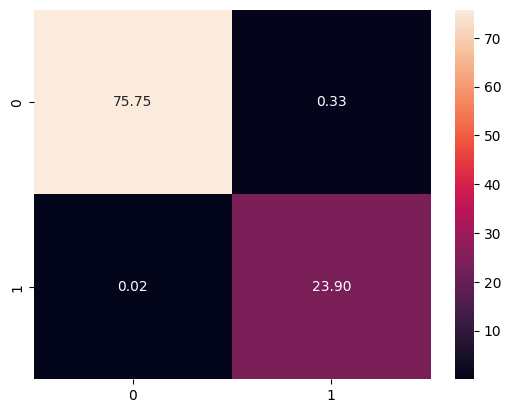

In [ ]:
cm=confusion_matrix(y_train,y_predict_train)
cm_percentage = cm / np.sum(cm) * 100 # for see lik pepercentage
sns.heatmap(cm_percentage,annot=True,fmt='.2f')

In [ ]:
y_predict_test=NB_classifier.predict(X_test)
cm1=confusion_matrix(y_test,y_predict_test)

<Axes: >

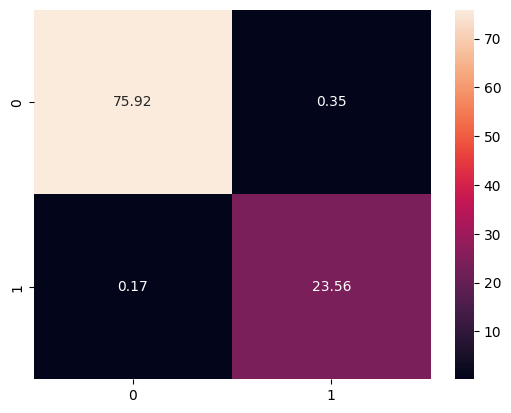

In [ ]:

cm_percentage1 = cm1/ np.sum(cm1) * 100 # for see lik pepercentage
sns.heatmap(cm_percentage1,annot=True,fmt='.2f')

In [ ]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       0.99      0.99      0.99       272

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

